In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json  # for json files
import numpy as np
from plots import plot_histogram
from datetime import datetime
from scipy.fftpack import fft
import seaborn as sb


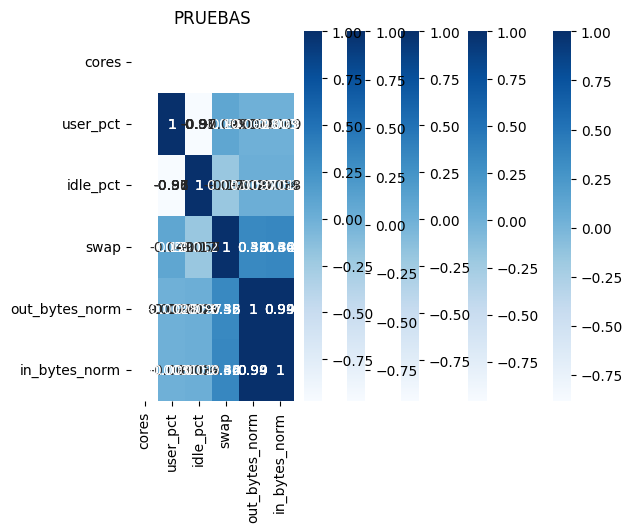

In [91]:
def correlation(name):
    data = pd.read_csv("resampled/" + name + "_resampled.csv")
    data = data.drop(['swap_free',"swap_total","actual_used_bytes","actual_used_pct","swap_norm","bytes_total","out_bytes","in_bytes","free","system_pct","bytes_total_norm"], axis=1)
    hm = sb.heatmap(data.loc[:, data.columns != 'host'].corr(), cmap="Blues", annot=True).set(title=name)

servers = ['DEVELOP','QASERVER','PRODUCCION', 'PREPRODUCCION','PRUEBAS']
for i in range(5):
    correlation(servers[i])

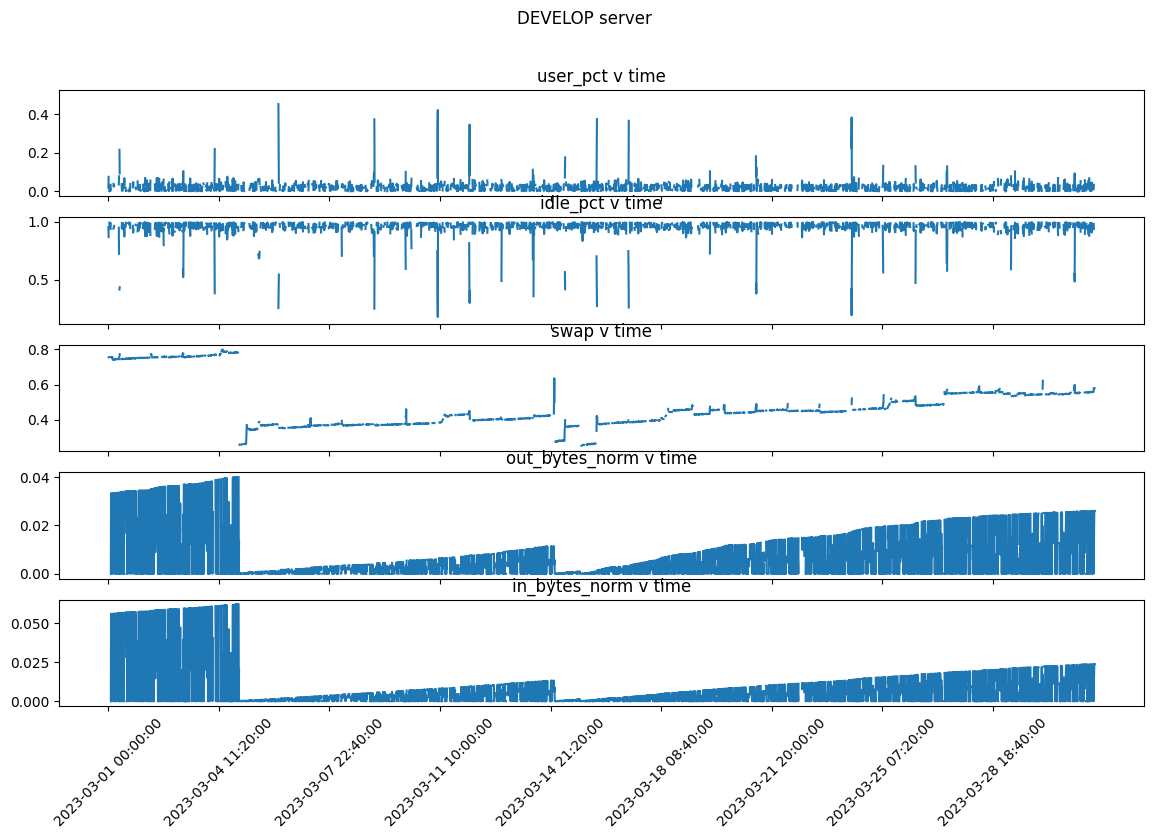

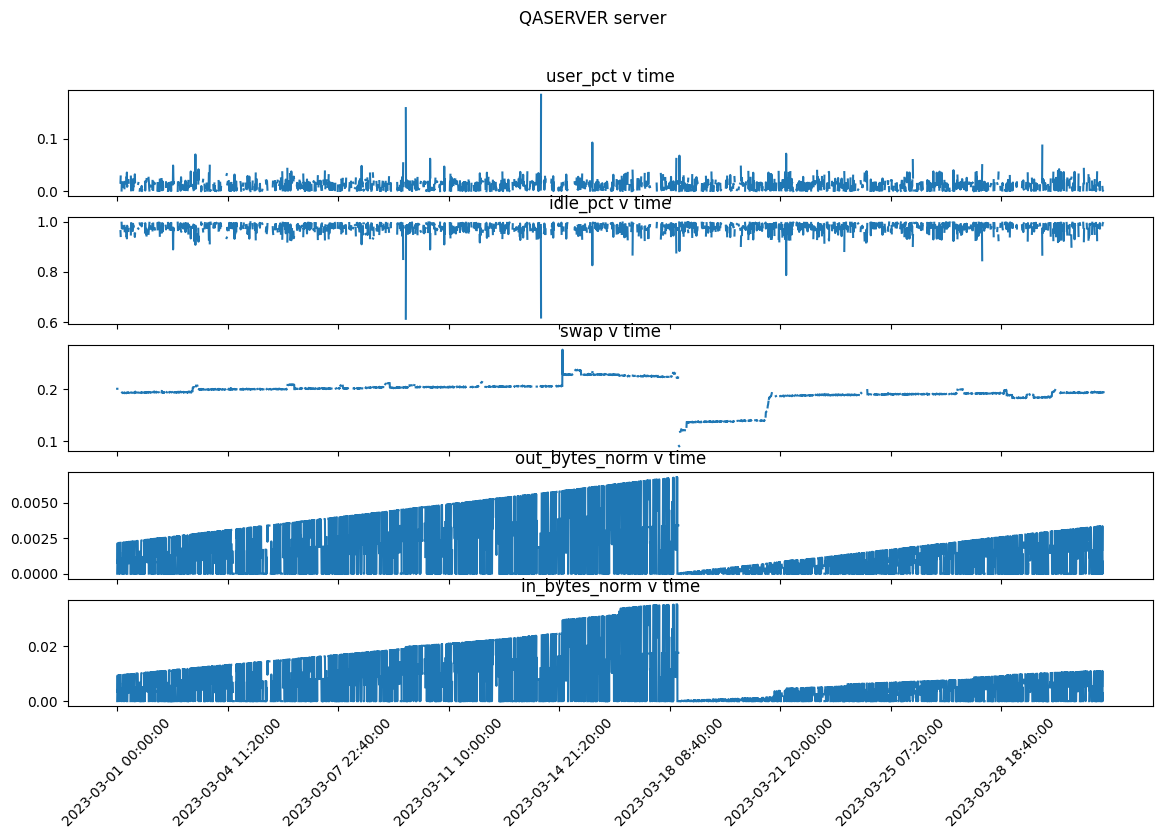

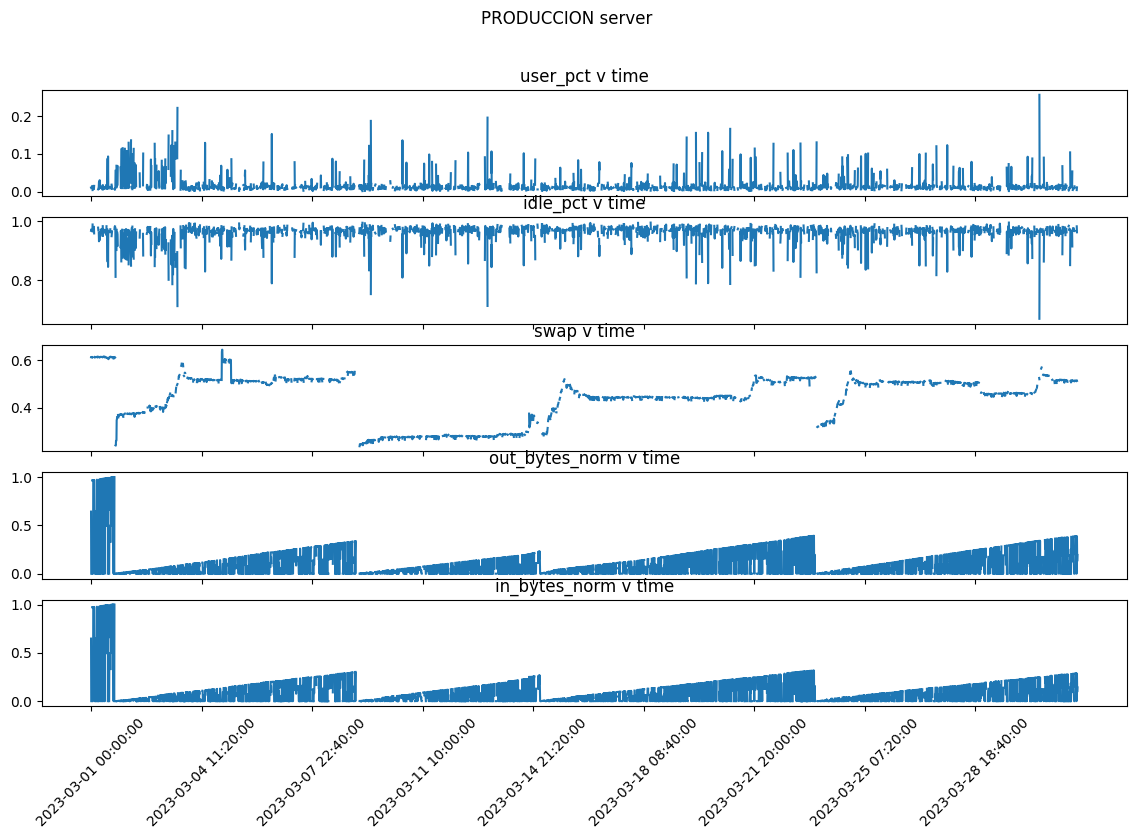

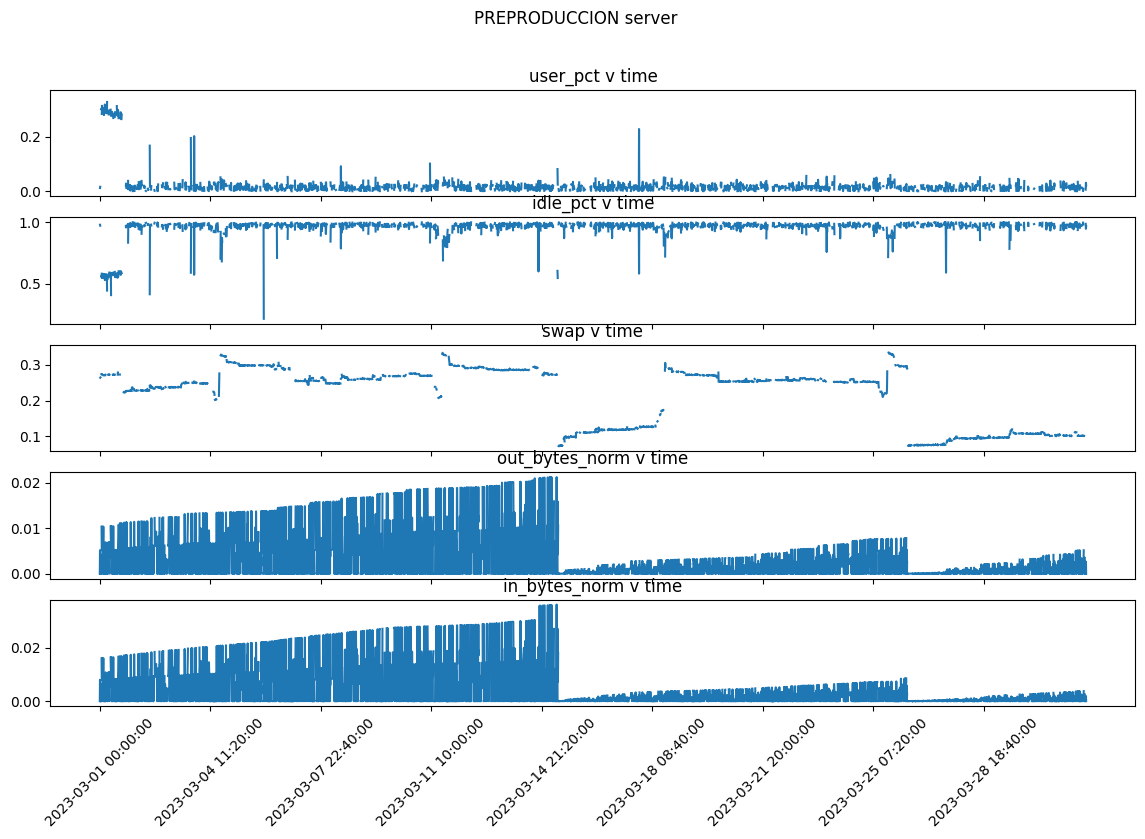

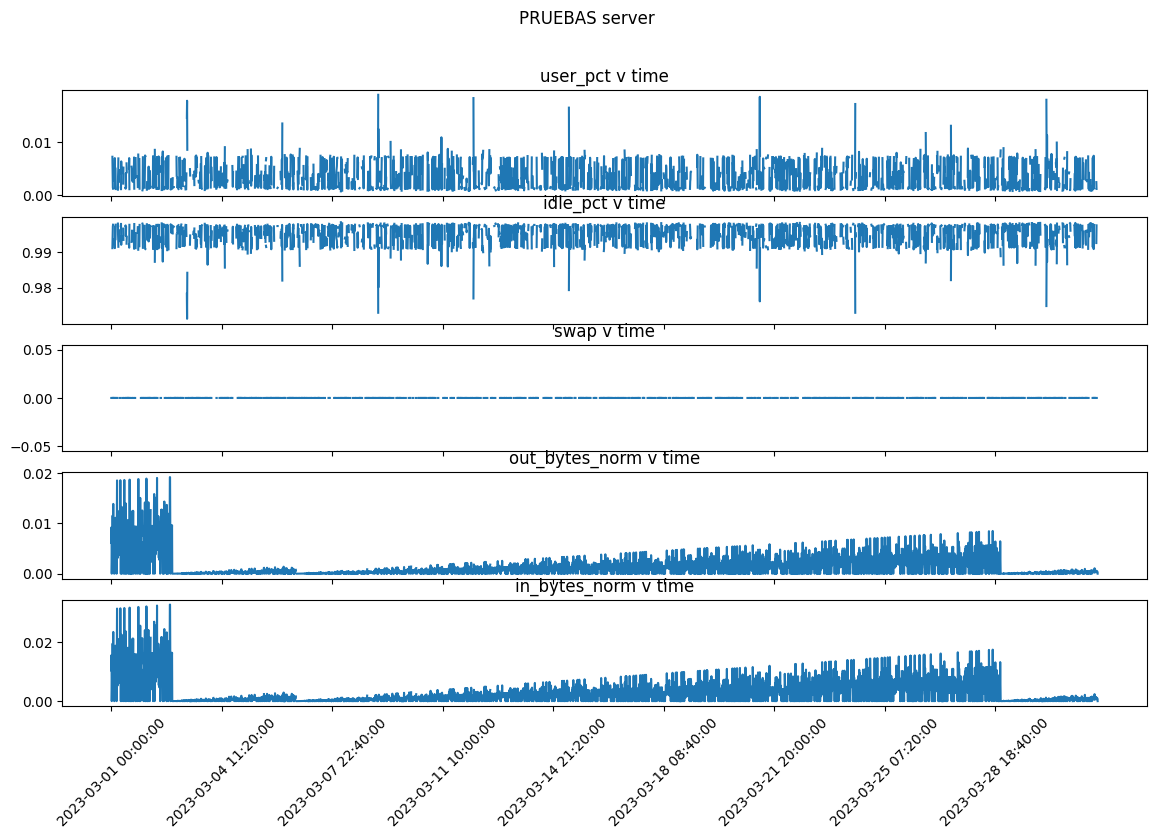

In [86]:
def plot(name):

    data = pd.read_csv("resampled/" + name + "_resampled.csv")

    time = data["@timestamp"]
    time_tick = data["@timestamp"][::500]

    user_pct = data["user_pct"]
    idle_pct = data["idle_pct"]
    swap = data["swap"]
    out_bytes_norm = data["out_bytes_norm"]
    in_bytes_norm = data["in_bytes_norm"]
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,sharex=True,figsize=(14,8))
    fig.suptitle(name + " server")

    ax1.plot(time, user_pct)
    ax1.set_title("user_pct v time")

    ax2.plot(time, idle_pct)
    ax2.set_title("idle_pct v time")

    ax3.plot(time, swap)
    ax3.set_title("swap v time")

    ax4.plot(time, out_bytes_norm)
    ax4.set_title("out_bytes_norm v time")

    ax5.plot(time, in_bytes_norm)
    ax5.set_title("in_bytes_norm v time")

    plt.xticks(rotation=45)
    plt.xticks(time_tick)
    plt.show()

def start():
    servers = ['DEVELOP','QASERVER','PRODUCCION', 'PREPRODUCCION','PRUEBAS']
    for i in range(5):
        plot(servers[i])

start()